In [1]:
%load_ext itikz
import itikz
from itikz import nicematrix as nM
import jinja2

import numpy as np
import sympy as sp

<div style="float:center;width:100%;text-align:center;"><strong style="height:100px;color:darkred;font-size:40px;">LU Decomposition</strong>
</div>

# 1. Basic Idea

## 1.1 Multiple Right-hand Sides

Consider solving the problem $A x = b$ for many different righthand sides:

<!--
A=sp.Matrix([[1,0,0,0],[2,1,0,0],[-4,1,1,0],[3,-2,1,1]])*sp.Matrix([[1,1,-1,2,0],[0,2,2,1,1],[0,0,1,4,3],[0,0,0,3,-2]]);
x = sp.Matrix([[-1,1,0,3,4],[0,1,1,2,1]]).T; b = A*x
Ab = A.col_insert( A.shape[1], b)

matrices = [[None, Ab]]; pivots = []; txt=[]

E1=sp.eye(4);E1[1:,0]=-Ab[1:,0]/A[0,0]; A1=E1*Ab;matrices.append([E1,A1]); pivots.append((1,1))
E2=sp.eye(4);E2[2:,1]=-A1[2:,1]/A1[1,1];A2=E2*A1;matrices.append([E2,A2]); pivots.append((2,2))
E3=sp.eye(4);E3[3:,2]=-A2[3:,2]/A2[2,2];A3=E3*A2;matrices.append([E3,A3]); pivots.append((3,3))
pivots.append((4,4))

mat_rep, submatrix_locs, pivot_locs, txt_with_locs,mat_format = nM.ge_layout( matrices, Nrhs=2, pivots=pivots, txt=txt, formater=lambda x: sp.latex(x))

itikz.fetch_or_compile_svg( jinja2.Template( nM.GE_TEMPLATE ).render( preamble=nM.preamble, extension=nM.extension,
             mat_rep=mat_rep, mat_format=mat_format, submatrix_locs=submatrix_locs, pivot_locs=pivot_locs, txt_with_locs=txt_with_locs),
                            prefix='lin_dep_', working_dir='/tmp/itikz', debug=False,
                            **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True), nexec=4, keep_dir="." )
-->
<div>
<div style="float:left;padding-right:0cm;"><img src="lu_multiple_rhs.svg"></div>
<!-- div style="float:left;margin-left:1cm;padding-left:1cm;border-left:2px solid black;height:4.3cm;"-->
<div style="float:left;width:60%;margin-left:2cm;">

**Remarks:** 
* The elementary operation matrices **do not change:**<br>$\qquad$ they are derived from the matrix $A$, independently from the $b$ vectors
* Algebraically, we **find matrice**s $E_1, E_2, E_3$ that introduce **zeros underneath the pivots**:<br>
* Upon completion, we have reduced the matrix $A$ to **row echelon form** $U$.
    
    
* **Adding a new right-hand side** only needs to compute the column<br>$\qquad$  under that right-hand side as the computation proceeds.
* Just update $b$ as we move down the stack!
</div></div>

----
<div style="float:left;padding-left:0.5cm;width:40%;height:6cm;border-right: 2px solid black;">

Giving the matrices in the layout names,<br>
    $\qquad$ we have carried out the following operations:

<img src="abstract_matrix_stack.svg" style="width:8cm;">
</div><div style="float:left;width:50%;padding-top:0.0cm;padding-left:0.5cm;">
    
Algebraically, we find matrices $E_1, E_2, E_3$ that introduce zeros underneath the pivots:<br>
$\qquad$
$\begin{align} (\xi)
& \quad \Leftrightarrow \quad A\ x &=&\; b_i, \qquad\qquad\qquad \text{ for } i = 1, 2 \dots \\
& \quad \Leftrightarrow \quad E_1 A\ x &=&\; E_1 b_i \\
& \quad \Leftrightarrow \quad \dots & \dots & \\
& \quad \Leftrightarrow \quad \left( E_k E_{k-1} \dots E_2 E_1 \right) A\ x &=&\;  \left( E_k E_{k-1} \dots E_2 E_1 \right) b_i \\
& \quad \Leftrightarrow \quad \color{red}{U}\ x &=&\;  \color{red}{y_i} \\
\end{align}
$

Upon completion, we have reduced the matrix $A$ to row echelon form:<br>
$\qquad\qquad
\color{red}{ U = {E}\ A, \qquad y = {E}\ b_i, \qquad \text{ where } {E} = \left( E_k E_{k-1} \dots E_2 E_1 \right) }
$
</div></div>

**Remark:**
* **Multiple right-hand sides do not require any changes** to the Gaussian Elimination Steps
* We obtain a right-hand side $y$ by **applying the Gaussian Elimination steps to** $b,$<br>
    $\quad$ i.e., $y = E\ b$

----
<div style="float:left;">

We could precompute the product ${E} = E_k E_{k-1} \dots E_2 E_1,$<br>$\qquad$ e.g., by augmenting the matrix with $I$.

<img src="lu_prod_E.svg">
</div>
<div style="float:left;padding-top:1cm;padding-left:1cm;">

* Comparing this product to the original $E_1, E_2, E_3$ matrices,<br>
  $\quad$ we see that the first subdiagonal in the product<br>
  $\quad$ is a copy of the corresponding entries in $E_i$ (shown in red).<br>
  $\quad$ The **remaining entries in blue are different: they require computation.**

* We have done **additional computations** to compute $E$,<br>
  $\quad$ while the number of operations required to compute $y = E b$ **remained the same**
</div>

<div style="float:left;">

Suppose we invert $E$,<br>
$\quad$ i.e., we find the matrix that recovers $A$ from $U$, i.e., $A = E^{-1} U$ 

<img src="lu_prod_Ei.svg">
</div><div style="float:left;padding-top:1cm;padding-left:1cm;">

* We have **factored** the matrix $\color{red}{A = E^{-1} U}$
* Comparing this product to the original $E_1, E_2, E_3$ matrices,<br>
$\qquad$ we see that the columns in the product (shown in red)<br>
$\qquad$ just copy into place!.<br>
* There is only a **sign change** applied below the diagonal of $E_i$
* **No additional computations were required.**
</div>

<div style="float:left;padding-right:1cm;">
    
**Remarks:**
* The colums fill in when we add columns from left to right in this product of matrices
    * **provided** there is **no row exchange**
* Scaling (an entry other than 1 on the diagonal) **does fill in**,<br>
  $\;\;\;$ but **the inverse requires scaling** in addition to a sign change.
</div>

<div style="float:left;padding-left:1cm;border-left: 2px solid black;height:3.5cm;">

The matrix $E^{-1}$ has **special properties** provided
* **Gaussian Elimination** reduces $A$ to row echelon form
    * **without row exchanges** (this may not be possible)
    * and **without scaling**   (this is a choice)
* It is **invertible** and **unit lower triangular:**  $\color{red}{\boxed{L = E^{-1}, A = L\ U}}$
</div>

## 1.2 The LU Decomposition

<div style="float:left;background-color:#F2F5A9;padding-right:1cm;">

**Theorem:** Let $A \in \mathbb{F}^{M \times N}$ have a row echeolon form $U$ obtained by Gaussian Elimination<br>
$\quad$ without row exchanges and without scaling.

$\quad$ Then $A = L U$, where the matrix $L$ is **invertible** and **unit lower triangular**

**Remark:** $L^{-1}$ is the **product of the elementary elimination matrices** that reduce $A$ to $U$.
</div>

### 1.2.1 Computation of the LU Decomposition

<div>
<div style="float:left;padding-right:0cm;"><img src="lu_example.svg"></div>
<!-- div style="float:left;margin-left:1cm;padding-left:1cm;border-left:2px solid black;height:4.3cm;"-->
<div style="float:left;width:60%;margin-left:2cm;">

**Algorithm:**column
* Perform **Gaussian Elimination** as usual
* Verify that **no scaling** and **no row-exhanges** were used in the computation 
* **Copy each non-zero column** from the elimination matrices into the $L$ matrices
* Fill in all remaining columns with the **remaining columns of $I$**
* **Change all the signs** below the diagonal

<br><br>
* **Check** the result by multiplying $L U$ to get $A$.
</div></div>

### 1.2.2 Forward Substitution

# 2. The PLU Decomposition

# 3. Examples

# 4. Take Away

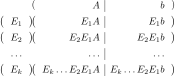

In [3]:
def abstract_matrix_stack():
    mat_rep = r'''
          &&                   A &                    b \\  \noalign{\vskip1.5mm}
    E_1   &&               E_1 A &                E_1 b \\  \noalign{\vskip1.5mm}
    E_2   &&           E_2 E_1 A &            E_2 E_1 b \\  \noalign{\vskip1.5mm}
    \dots && \dots               & \dots                \\  \noalign{\vskip1.5mm}
    E_k   && E_k \dots E_2 E_1 A &  E_k \dots E_2 E_1 b
    '''
    submatrix_locs=['{1-3}{1-4}','{2-3}{2-4}','{3-3}{3-4}','{5-3}{5-4}',
                    '{2-1}{2-1}','{3-1}{3-1}','{5-1}{5-1}'
                   ]
    pivot_locs=[]
    txt_with_locs=[]
    mat_format='{ccrIr}'

    return itikz.fetch_or_compile_svg( jinja2.Template( nM.GE_TEMPLATE ).render( preamble=nM.preamble, extension=nM.extension,
                                                                          mat_rep=mat_rep, mat_format=mat_format, submatrix_locs=submatrix_locs, pivot_locs=pivot_locs, txt_with_locs=txt_with_locs),
                                prefix='lu_', working_dir='/tmp/itikz', debug=False,
                                **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True), nexec=4, keep_dir="." )
abstract_matrix_stack()

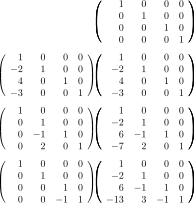

In [8]:
def prod_E_i():
    A  = sp.Matrix([[1,0,0,0],[2,1,0,0],[-4,1,1,0],[3,-2,1,1]])*sp.Matrix([[1,1,-1,2,0],[0,2,2,1,1],[0,0,1,4,3],[0,0,0,3,-2]]);
    x  = sp.Matrix([[-1,1,0,3,4],[0,1,1,2,1]]).T; b = A*x
    Ab = A.col_insert( A.shape[1], b)

    E1=sp.eye(4);E1[1:,0]=-Ab[1:,0]/A[0,0]; A1=E1*Ab
    E2=sp.eye(4);E2[2:,1]=-A1[2:,1]/A1[1,1];A2=E2*A1
    E3=sp.eye(4);E3[3:,2]=-A2[3:,2]/A2[2,2];A3=E3*A2

    I        = sp.Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
    matrices = [[None, I], [E1, E1], [E2, E2 * E1], [E3,E3*E2*E1]]; pivots = []; txt=[]

    mat_rep, submatrix_locs, pivot_locs, txt_with_locs,mat_format = nM.ge_layout( matrices, Nrhs=0, pivots=pivots, txt=txt, formater=lambda x: sp.latex(x))

    return itikz.fetch_or_compile_svg( jinja2.Template( nM.GE_TEMPLATE ).render( preamble=nM.preamble, extension=nM.extension,
             mat_rep=mat_rep, mat_format=mat_format, submatrix_locs=submatrix_locs, pivot_locs=pivot_locs, txt_with_locs=txt_with_locs),
                            prefix='lu_prod_Ei_', working_dir='/tmp/itikz', debug=False,
                            **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True), nexec=4, keep_dir="." )
prod_E_i()

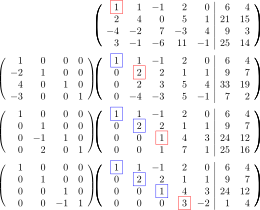

In [7]:
def lu_problem():
    A=sp.Matrix([[1,0,0,0],[2,1,0,0],[-4,1,1,0],[3,-2,1,1]])*sp.Matrix([[1,1,-1,2,0],[0,2,2,1,1],[0,0,1,4,3],[0,0,0,3,-2]]);
    x = sp.Matrix([[-1,1,0,3,4],[0,1,1,2,1]]).T; b = A*x
    Ab = A.col_insert( A.shape[1], b)

    matrices = [[None, Ab]]; pivots = []; txt=[]

    E1=sp.eye(4);E1[1:,0]=-Ab[1:,0]/A[0,0]; A1=E1*Ab;matrices.append([E1,A1]); pivots.append((1,1))
    E2=sp.eye(4);E2[2:,1]=-A1[2:,1]/A1[1,1];A2=E2*A1;matrices.append([E2,A2]); pivots.append((2,2))
    E3=sp.eye(4);E3[3:,2]=-A2[3:,2]/A2[2,2];A3=E3*A2;matrices.append([E3,A3]); pivots.append((3,3))
    pivots.append((4,4))

    mat_rep, submatrix_locs, pivot_locs, txt_with_locs,mat_format = nM.ge_layout( matrices, Nrhs=2, pivots=pivots, txt=txt, formater=lambda x: sp.latex(x))

    return itikz.fetch_or_compile_svg( jinja2.Template( nM.GE_TEMPLATE ).render( preamble=nM.preamble, extension=nM.extension,
                 mat_rep=mat_rep, mat_format=mat_format, submatrix_locs=submatrix_locs, pivot_locs=pivot_locs, txt_with_locs=txt_with_locs),
                                prefix='lin_dep_', working_dir='/tmp/itikz', debug=False,
                                **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True), nexec=4, keep_dir="." )
lu_problem()

In [15]:
Foo=sp.Matrix([[1,2,1],[1,0,1],[0,1,-1]])
Foo**(-1)

Matrix([
[-1/2,  3/2,  1],
[ 1/2, -1/2,  0],
[ 1/2, -1/2, -1]])

In [31]:
def prod_E_i_inv():
    def combine( l ):
        A = l[0]
        for i in l[1:]:
            A = A.col_insert( A.shape[1], i)
        return A
    
    A  = sp.Matrix([[1,0,0,0],[2,1,0,0],[-4,1,1,0],[3,-2,1,1]])*sp.Matrix([[1,1,-1,2,0],[0,2,2,1,1],[0,0,1,4,3],[0,0,0,3,-2]]);
    x  = sp.Matrix([[-1,1,0,3,4],[0,1,1,2,1]]).T; b = A*x
    Ab = A.col_insert( A.shape[1], b)

    E1=sp.eye(4);E1[1:,0]=-Ab[1:,0]/A[0,0]; A1=E1*Ab
    E2=sp.eye(4);E2[2:,1]=-A1[2:,1]/A1[1,1];A2=E2*A1
    E3=sp.eye(4);E3[3:,2]=-A2[3:,2]/A2[2,2];A3=E3*A2

    E1i = E1**(-1);E2i = E2**(-1);E3i = E3**(-1)

    I        = sp.Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
    matrices = [[None, combine([E3, E2, E1 ])], [combine([I, E3, E3*E2, E3*E2*E1]) ]] ; pivots = []; txt=[]

    mat_rep, submatrix_locs, pivot_locs, txt_with_locs,mat_format = nM.ge_layout( matrices, Nrhs=0, pivots=pivots, txt=txt, formater=lambda x: sp.latex(x))
    submatrix_locs = ['{1-5}{5-10}']
    return  mat_rep, submatrix_locs,mat_format

    return itikz.fetch_or_compile_svg( jinja2.Template( nM.GE_TEMPLATE ).render( preamble=nM.preamble, extension=nM.extension,
             mat_rep=mat_rep, mat_format=mat_format, submatrix_locs=submatrix_locs, pivot_locs=pivot_locs, txt_with_locs=txt_with_locs),
                            prefix='lu_prod_Ei_', working_dir='/tmp/itikz', debug=False,
                            **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True), nexec=4, keep_dir="." )
prod_E_i_inv()

('% --------------------------------------------\n &   &   &   & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 &  \\\\ \n &   &   &   & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & -2 & 1 & 0 & 0 &  \\\\ \n &   &   &   & 0 & 0 & 1 & 0 & 0 & -1 & 1 & 0 & 4 & 0 & 1 & 0 &  \\\\ \n &   &   &   & 0 & 0 & -1 & 1 & 0 & 2 & 0 & 1 & -3 & 0 & 0 & 1 &  \\\\ \\noalign{\\vskip2mm} \n % ---------------------------------------------\n1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 &  \\\\ \n0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & -2 & 1 & 0 & 0 &  \\\\ \n0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & -1 & 1 & 0 & 6 & -1 & 1 & 0 &  \\\\ \n0 & 0 & 0 & 1 & 0 & 0 & -1 & 1 & 0 & 3 & -1 & 1 & -13 & 3 & -1 & 1 & ',
 ['{1-5}{5-10}'],
 '{*4r@{\\qquad\\ }*12r@{\\qquad\\;\\;}r}')

In [22]:
Foo.col_insert( Foo.shape[1], Foo)

Matrix([
[1, 2,  1, 1, 2,  1],
[1, 0,  1, 1, 0,  1],
[0, 1, -1, 0, 1, -1]])

In [40]:
A=sp.Matrix([[1,0,0,0],[2,1,0,0],[-4,1,1,0],[3,-2,1,1]])*sp.Matrix([[1,1,-1,2,0],[0,2,2,1,1],[0,0,1,4,3],[0,0,0,3,-2]]);
x = sp.Matrix([[-1,1,0,3,4],[0,1,1,2,1]]).T; b = A*x
Ab = A.col_insert( A.shape[1], b)

matrices = [[None, Ab]]; pivots = []; txt=[]

E1=sp.eye(4);E1[1:,0]=-Ab[1:,0]/A[0,0]; A1=E1*Ab;matrices.append([E1,A1]); pivots.append((1,1))
E1c=sp.eye(4);E1c[1:,0]=-Ab[1:,0]/A[0,0];E1c[0,0]=2
E2=sp.eye(4);E2[2:,1]=-A1[2:,1]/A1[1,1];A2=E2*A1;matrices.append([E2,A2]); pivots.append((2,2))
E3=sp.eye(4);E3[3:,2]=-A2[3:,2]/A2[2,2];A3=E3*A2;matrices.append([E3,A3]); pivots.append((3,3))
E1*E2*E3, E1c*E2*E3

(Matrix([
 [ 1,  0,  0, 0],
 [-2,  1,  0, 0],
 [ 4, -1,  1, 0],
 [-3,  2, -1, 1]]),
 Matrix([
 [ 2,  0,  0, 0],
 [-2,  1,  0, 0],
 [ 4, -1,  1, 0],
 [-3,  2, -1, 1]]))